In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

noOfIter = 2000
lr = 0.1
#WIKIPEDIA DATASET
X = np.asarray ([[0.50], [0.75], [1.00], [1.25], [1.50], [1.75], [1.75], [2.00],
[2.25], [2.50], [2.75], [3.00], [3.25], [3.50], [4.00], [4.25], [4.50], [4.75],
[5.00], [5.50]])

y = np.asarray([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,1,0,1,1,1,1,1,1])

#PDF DATASET
X_test = np.asarray ([[0.50], [0.75], [1.00], [1.25], [1.50], [1.75], [3.00], [4.75],
[1.75], [3.25], [5.00], [2.00], [2.25], [2.50], [2.75], [3.50], [4.00], [4.25],
[4.50], [5.50]])

y_test =  np.asarray([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,0,1,0,1,1,1,1,1,1])

lossElem = []


def sigmoid(z):
    ''' 
    g(z) = 1 / 1 + e^-z  ===> this is what the function does
    
    0 <= g(z) <= 1
    
    This is an activation function which squashes limits 0-1. This function will be used in the prediction stage.
    
    Reference: https://en.wikipedia.org/wiki/Sigmoid_function
               https://deepai.org/machine-learning-glossary-and-terms/sigmoid-function
               https://mathworld.wolfram.com/SigmoidFunction.html
               
    '''
    return 1/(1 + np.exp(-z))


def lossFunc(h, y):
    ''' Loss with logarithms - found in slides 
    takes as input labels and predicted labels(h); it calculates cost, and then returns mean of cost
    
    Reference:https://www.analyticsvidhya.com/blog/2019/08/detailed-guide-7-loss-functions-machine-learning-python-code/
              https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html
              https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html
    '''
    cost = (-y * np.log(h) - (1-y) * np.log(1-h))
    return cost.mean()

def fit(X, y):
    ''' This function takes as inputs dataset X and labels y. It goes through a number of iterations and calculates label prediction
    using the sigmoid function. On top of that, it adds loss for every iteration to the lossElem array. It then calculates the gradient
    for weight and bias, which are then used to update w and b. The function returns weight and bias. 
    
    Reference:https://towardsdatascience.com/difference-between-batch-gradient-descent-and-stochastic-gradient-descent-1187f1291aa1
              https://stats.stackexchange.com/questions/49528/batch-gradient-descent-versus-stochastic-gradient-descent
    '''
    samp = X.shape[0] #stores number of samples of dataset - 20 in this case as there are 20 elements in X
    feat = X.shape[1] #dimensions - 1
    w = np.zeros(feat) #numpy array with 0 and length feat
    b = 0 #initialising bias to 0
    
            # y = sigmoid(w * x + bias) 
    for k in range(noOfIter):
        y_pred = sigmoid(np.dot(X, w) + b) #limiting and predicting labels using sigmoid function - getting values between 0 and 1
        lossElem.append(lossFunc(y_pred,y)) #storing loss values using lossFunction
        
        gw = (1/samp) * np.dot(X.transpose(), (y_pred-y)) #gradient for weight
        gb = (1/samp) * np.sum(y_pred-y) #gradient for bias
        
        w -= lr * gw #updating w
        b -= lr * gb #updating b
        
        
    return w, b #return weight and bias

def pred(X, w, b):
    ''' Prediction function - takes dataset, weight and bias as input. It returns an array of predictions
        y_pred variable calculates the product(of items in dataset, weight and bias) and places them in the sigmoid function
        it then checks in the for loop - if y_pred is greater than 0.5, then it belongs to class 1, otherwise, it belongs to class 0
        
        If z ≫ 0: g(z) → 1
        If z ≪ 0: g(z) → 0
        '''
    
    y_pred = sigmoid(np.dot(X, w) + b)
    #yPredClass = [1 if i > 0.5 else 0 for i in y_pred]
    #print(y_pred)
    yPredClass = []
    for i in y_pred:
        if i > 0.5:
            yPredClass.append(1)
        else:
            yPredClass.append(0) 
            
    return yPredClass

def accuracy_metric(actual, predicted):
    ''' Accuracy function - takes correct values and predicted values as inputs. Creates a variable correct. Iterates through the number of 
    elements and if the elements in the actual array match the elements in the predicted array then add one to the correct variable.
    it then returns the accuracy by dividing the number of correct matches by the length of the array, which is then multiplied by
    100
    '''
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

w, b = fit(X,y)
predicted = pred(X_test, w, b)
#lossElem

#(predicted == y_test).mean() * 100
accuracy_metric(y_test, predicted)


80.0

# Task 2 - Write up

Sigmoid function: (1 / 1 + e^-z) uses this formula to compress the limits to 0 and 1. All values will be between 0 and 1.

lossFunc function: calculates loss between actual values and predicted values. I have used the formula provided in the lecture slides, and I have coded it.

fit function: setting the number of samples and features based on the array. I then created a numpy array 'w' containing 0 for the number of samples, and I initiliased the bias to 0. I then iterated through a set number of iterations and calculated the predicted values by using the sigmoid function(to limit values) and dot product between weight and X(all elements) and then adding the bias. I have then calculated the loss between predicted and actual values, which is added to lossElem. I then calculated the gradient of weight(dot product of transposed elements in the array and the difference between predicted labels and actual labels; all divided by the number of elements) and bias(the sum of the difference between predicted labels and actual labels, all divided by the number of elements), which is then used to update the values of w(taking away the product of learning rate and gradient of weight) and b(taking away the product of learning rate and gradient of bias). The function then returns weight and bias

pred function: Firstly, I am getting the predicted labels by using the sigmoid function, and calculating the dot product of elements in the array and weight, and adding bias to it. I then iterated through that array(that stores the labels predicted using sigmoid) and if the predicted values are over 0.5, it belongs to class 1, and if they are below 0.5, it belongs to class 0. These values are added to yPredClass which is then returned

accuracy_metric function: checks values from predicted and actual, and if they match, a counter is increased. It is then divided by the number of records and multiplied by 100 to give accuracy

# Question 1

After how many iterations, and for which learning rate (α) did your algorithm converge? Plot the loss function with respect to iterations to illustrate this point

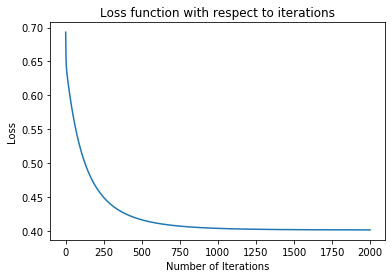

In [14]:
df = pd.DataFrame(lossElem)
lines = df.plot.line()
lines.legend().set_visible(False)
lines.set_xlabel("Number of Iterations")
lines.set_ylabel("Loss")
lines.set_title("Loss function with respect to iterations")
lines

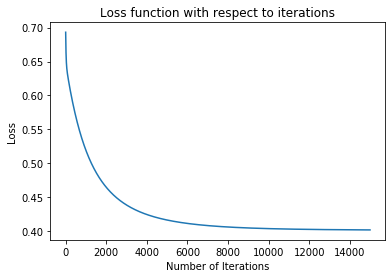

In [18]:
df = pd.DataFrame(lossElem)
lines = df.plot.line()
lines.legend().set_visible(False)
lines.set_xlabel("Number of Iterations")
lines.set_ylabel("Loss")
lines.set_title("Loss function with respect to iterations")
lines

My algorithm converged at roughly 850 iterations(max iteration 2000) with learning rate 0.1
My algorithm converged at roughly 8000 iterations(max iterations 15000) with learning rate 0.01

# Question 2

What happens if α is too large? How does this affect the loss function?
Plot the loss function with respect to iterations to illustrate this point.

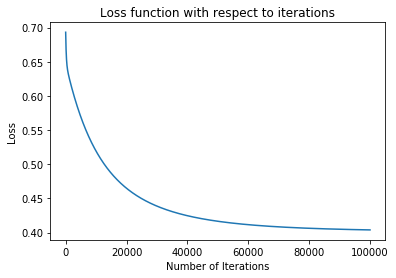

In [26]:
df = pd.DataFrame(lossElem)
lines = df.plot.line()
lines.legend().set_visible(False)
lines.set_xlabel("Number of Iterations")
lines.set_ylabel("Loss")
lines.set_title("Loss function with respect to iterations")
lines

A small learning rate will take a long time to converge — you might run out of time or cycles before getting an answer. A large learning rate might skip over the best value.
In this example, the learning rate is 0.001. It also changes the loss function as the gradient is changed as well.
I have noticed that the smaller the learning rate, the more iterations are needed for the algorithm to converge.

# Question 3

Assume that you are applying logistic regression to the iris (flower)
dataset, as in the previous assignment. Answer the following questions:
(a) How would your hypothesis function change in this case and why?
(b) How would you utilize your implementation of logistic regression in order to
perform (multi-class) classification on the iris dataset? Include some pseudocode
while discussing your approach. 

a)I would change my hypothesis function so it would be able to take multiple classes because the iris dataset had multiple classes of labels.

b)I would use Softmax(it is a multi class sigmoid) instead of sigmoid, which will calculate probability for every possible class.

Reference:(https://datascience.stackexchange.com/questions/39264/how-does-sigmoid-activation-work-in-multi-class-classification-problems),
(https://www.quora.com/Why-is-it-better-to-use-Softmax-function-than-sigmoid-function)

Softmax:


\begin{equation*}
h_{θ} (x) = \frac{1}{1+ exp(-θ^{T}x)}
\end{equation*}